
# Исследование работы сервиса аренды самокатов GoFast 


## Описание проекта 

  Поставлена задача проанализировать работу популярного сервиса аренды самокатов GoFast. Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.   
  Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.    
  Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
 -	без подписки 
   -	абонентская плата отсутствует;
   -	стоимость одной минуты поездки — 8 рублей;
   -	стоимость старта (начала поездки) — 50 рублей;
 -	с подпиской Ultra 
   -	абонентская плата — 199 рублей в месяц;
   -	стоимость одной минуты поездки — 6 рублей;
   -	стоимость старта — бесплатно.

### Описание данных

Предоставлены основные данные, в которых есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`\
`user_id`	уникальный идентификатор пользователя\
`name`	имя пользователя\
`age`	возраст\
`city`	город\
`subscription_type`	тип подписки (free, ultra)

Поездки — `rides_go.csv`\
`user_id`	уникальный идентификатор пользователя\
`distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)\
`duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»\
`date`	дата совершения поездки

Подписки — `subscriptions_go.csv`
`subscription_type`	тип подписки\
`minute_price`	стоимость одной минуты поездки по данной подписке\
`start_ride_price`	стоимость начала поездки\
`subscription_fee`	стоимость ежемесячного платежа\

### План работы

Проанализировать данные из 3 файлов с информацией о пользователях, их поездках и подписках популярного сервиса аренды самокатов GoFast. Провести аннализ данных на наличие пропусков и дубликатов. Провести ииследования полученных данных с их визуализацией. Проверить ряд гипотез и решитьзадачи на распределения.

Таким образом, исследование пройдёт в 7 этапов:

- Загрузка и обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Распределения

## Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm
from scipy import stats as st
import random
from math  import sqrt

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


***Описание данных о пользователях:***

-	user_id — уникальный идентификатор пользователя
-	name — имя пользователя
-	age — возраст
-	city — город
-	subscription_type — тип подписки (free, ultra)

***Наблюдаем корректность в наименованиях столбцов и типов данных о пользователях сервиса аренды самокатов.***

In [4]:
rides = pd.read_csv('/datasets/rides_go.csv')
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


***Описание данных о поездках:***

-	user_id — уникальный идентификатор пользователя
-	distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
-	duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
-	date — дата совершения поездки

***Наблюдаем корректность в наименованиях столбцов. В дальнейшем целесообразно поменять тип данных в столбце даты совершения поездки (data) на соответствие типу даты pandas. В остальных столбцах корректно указан тип данных.***

In [6]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


***Описание данных о подписках:***

-	subscription_type — тип подписки
-	minute_price — стоимость одной минуты поездки по данной подписке
-	start_ride_price — стоимость начала поездки
-	subscription_fee — стоимость ежемесячного платежа

***Наблюдаем корректность в наименованиях столбцов и типов данных о подписках клиентов сервиса аренды самокатов.***

## Шаг 2. Проведём предобработку данных

***Проверим наши таблицы на наличие пропусков и дубликатов.***

In [8]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [10]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

***Пропусков в наших таблицах не наблюдаем.***

In [11]:
users.duplicated().sum()

31

In [12]:
users = users.drop_duplicates()

In [13]:
rides.duplicated().sum()

0

In [14]:
subscriptions.duplicated().sum()

0

***Обнаружили дубликаты в таблице данных о пользователях сервиса. Дубликаты удалили. В остальных таблицах дубликаты не обнаружены. Считаем нужным округлить дробные значения показателей дистанции и времени поездок.***

***Приведём данные о датах совершения поездок в столбце (data) в соответствие с типом даты pandas, который переводит строки в даты. Воспользуемся для этого методом to_datetime(). Проверим за какой период предоставлены данные. Создадим новый столбец с номером месяца на основе столбца date.***

In [15]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
display(rides['date'].min(), rides['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

In [16]:
rides['date_month'] = rides['date'].dt.month
print('Проверим содержимое столбца с номерами месяцев:', rides['date_month'].sort_values().unique())

Проверим содержимое столбца с номерами месяцев: [ 1  2  3  4  5  6  7  8  9 10 11 12]


***Данные предоставлены за период с 1 января 2021 года по 30 декабря 2021 годов. В новом столбце отразили месяц в котором была совершена поездка.***

## Шаг 3. Проведём исследовательский анализ данных

<font size="4"><font color=blue>Изучим следующие параметры объектов:</font>

<font size="4"><font color=blue>3.1 Проанализируем список городов используемых сервисом и исследуем их частоту встречаемости.</font>

In [17]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

***Посмотрим на их процентное соотношение.***

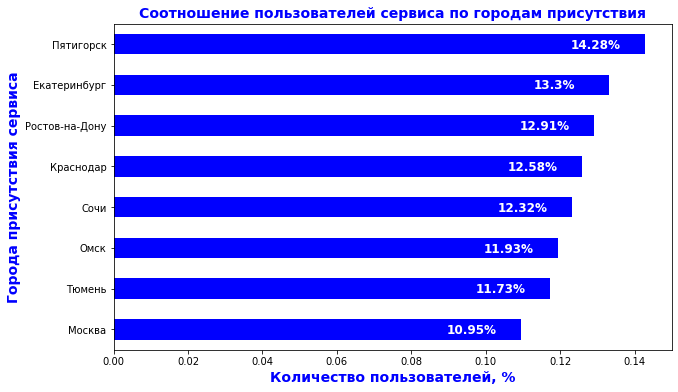

In [18]:
all_users = len(users)
city_users = users.groupby('city').size()/all_users
city_users_sort = city_users.sort_values()



schedule = city_users_sort.plot(kind='barh', color='blue', figsize=(10,6))

plt.title('Соотношение пользователей сервиса по городам присутствия', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Количество пользователей, %', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Города присутствия сервиса', fontsize=14, fontweight="bold", color='blue')

percent = dict(city_users_sort)

i = -0.1
for row in percent:
    schedule.text(percent[row]-0.02, i, str(round(percent[row]*100, 2)) + '%', 
            fontsize = 'large', fontweight='bold', color='white') 
    i += 1

***Чаще всего в наших данных пользователей упоминается город Пятигорск 14.28% и реже всего Москва 10.95%.***

<font size="4"><font color=blue>3.2 Исследуем соотношение пользователей с подпиской и без подписки.</font>

In [19]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

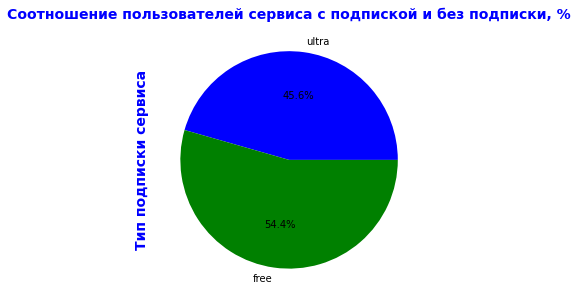

In [20]:
all_users = len(users)
sub_users = users.groupby('subscription_type').size()/all_users
sub_users_sort = sub_users.sort_values()
schedule = sub_users_sort.plot(kind='pie', y='points', figsize=(5, 5), autopct='%0.1f%%', colors = ['blue', 'green'])

plt.rc('font', size= 20 )
plt.title('Соотношение пользователей сервиса с подпиской и без подписки, %', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Тип подписки сервиса', fontsize=14, fontweight="bold", color='blue')

None

***Среди предоставленных данных количество пользователей с подпиской составляет 45.6%, а без подписки 54.4%.***

<font size="4"><font color=blue>3.3 Исследуем возраст пользователей сервиса самокатов.</font>

In [21]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [22]:
users['age'].value_counts().head()

25    145
24    132
26    131
23    129
27    119
Name: age, dtype: int64

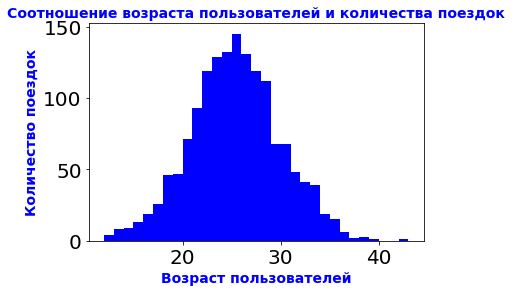

In [23]:
plt.hist(users['age'], color = "blue", bins=31)
plt.title('Соотношение возраста пользователей и количества поездок', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Возраст пользователей', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

***Исследование показало, что возраст пользователей сервиса самокатов находится в диапазоне от 12 до 43 лет. Максимальным спросом у сервиса пользуется клиенты с возрастом 25 лет.***

<font size="4"><font color=blue>3.4 Исследуем расстояние, которое пользователь преодолел за одну поездку.</font>

In [24]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

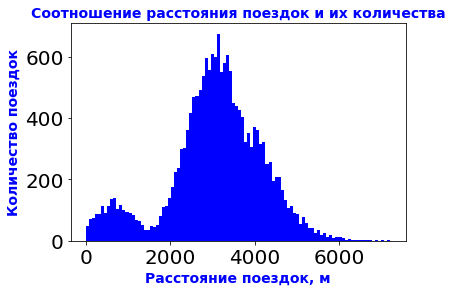

In [25]:
plt.hist(rides['distance'], color = "blue", bins=100)
plt.title('Соотношение расстояния поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

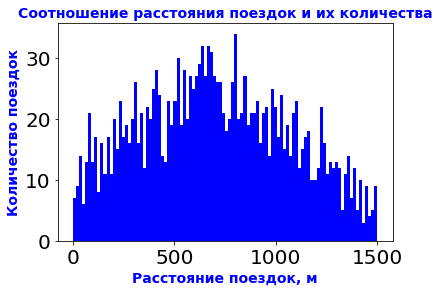

In [26]:
plt.hist(rides['distance'], color = "blue", bins=100, range=(0,1500))
plt.title('Соотношение расстояния поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

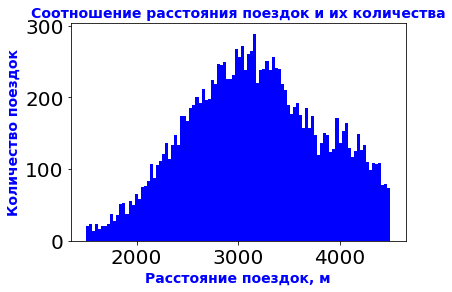

In [27]:
plt.hist(rides['distance'], color = "blue", bins=100, range=(1500,4500))
plt.title('Соотношение расстояния поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

***Исследование показало, что мы имеем 2 значимых пика на гистограмме. Малый всплеск в районе около 700 м преодолеваемое клиентами сервиса и второй около 3200 метров.\
Допускаем, что первая группа со средним преодоливаемым расстоянием 700 м использует самокат, чтобы доехать до ближайшего пункта пересадки на другой транспорт (метро, автобус). А вторая группа принимает решение продолжать путь на большее расстояние до конечного пунтка назначения.***

<font size="4"><font color=blue>3.5 Рассмотрим продолжительность поездок.</font>

In [28]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

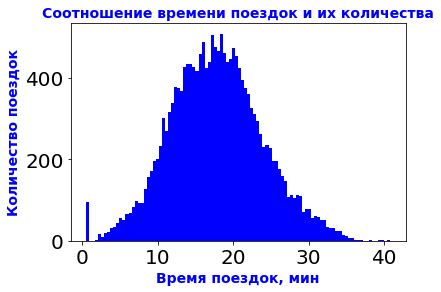

In [29]:
plt.hist(rides['duration'], color = "blue", bins=100)
plt.title('Соотношение времени поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

***Гистограмма показала необычный всплеск вблизи нулевого "0" времени. Проанализируем детальней.***

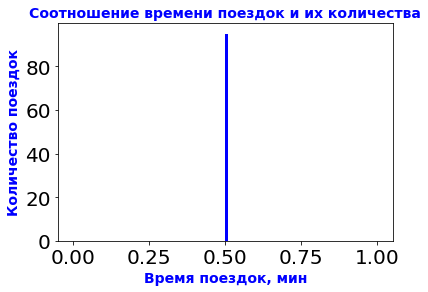

In [30]:
plt.hist(rides['duration'], color = "blue", bins=100, range=(0,1))
plt.title('Соотношение времени поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

***Значительное количество клиентов сервиса пользовались самокатом около половины минуты. Рассмотрим подробнее строки с этими поездками.***

In [31]:
rides.head(10)
rides[rides['duration'] < 1].head(10)

,user_id,distance,duration,date,date_month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


***Несмотря на указанное потраченное время 0.5 минут, расстояние пройденное при поездках было значительное. Это аномальная ошибка, требующая внести коррективы в указание времени поездок. Возьмем для поездок более 1 минуты среднее отношение расстояния поездок к их времени. И используем этот коэффициент для замены аномальных значений.***

In [32]:
print('Доля поездок с ошибкой указания времени составляет:', 
      (rides.loc[rides['duration'] < 1, 'duration'].count()/rides['duration'].count()*100).round(2),'%')

Доля поездок с ошибкой указания времени составляет: 0.53 %


In [33]:
rides_div = rides.loc[rides['duration'] >= 1, 'distance'] / rides.loc[rides['duration'] >= 1, 'duration']
k = rides_div.mean()
k

176.91526708769788

In [34]:
rides.loc[rides['duration'] < 1, 'duration'] = rides.loc[rides['duration'] < 1, 'distance'] / k
rides['duration'].min()

2.0356324681963884

***Аномальные ошибочные значения были выевлены и они составляли 0.53% от общего числа поездок. Аномалии заменены. Поездок со временем менее 1 минуты в таблице устранены. Минимальное время поездки после исправления 2 минуты. Видимо программное обеспечение самоката фиксировало пройденное расстояние, но по ошибке выдавало время поездки 0.5 минут.***

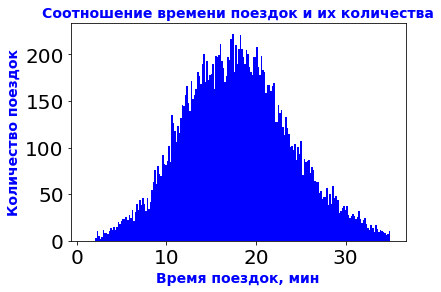

In [35]:
plt.hist(rides['duration'], color = "blue", bins=200, range=(1,35))
plt.title('Соотношение времени поездок и их количества', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

***Анализ графика показал, что самым распространненым можно считать продолжительность поездки около 18 минут.***

## Шаг 4. Проведём объединение данных

<font size="4"><font color=blue>4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().</font>

In [36]:
scoot = rides.merge(users, on='user_id', how='left')
scoot.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [37]:
scooter = scoot.merge(subscriptions, on='subscription_type', how='left')
scooter.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [38]:
print('Количество строк в данных о пользователях:', len(users))
print('Количество строк в данных о поездках:', len(rides))
print('Количество строк в данных о подписках:', len(subscriptions))
print('Количество строк после объединения:', len(scooter))

Количество строк в данных о пользователях: 1534
Количество строк в данных о поездках: 18068
Количество строк в данных о подписках: 2
Количество строк после объединения: 18068


***Мы провели объединение корректно. Ничего не потеряли и лишнего не добавили.***

<font size="4"><font color=blue>4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:\
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.
</font>

In [39]:
scooter['subscription_type'].value_counts()

free     11568
ultra     6500
Name: subscription_type, dtype: int64

In [40]:
scooter_free = scooter[scooter['subscription_type'] == 'free'].reset_index() 
scooter_free.head()

,index,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [41]:
scooter_ultra = scooter[scooter['subscription_type'] == 'ultra'].reset_index()   
scooter_ultra.head()

,index,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


<font size="4"><font color=blue>4.3 Визуализирум информацию о расстоянии и времени поездок для пользователей обеих категорий.
</font>

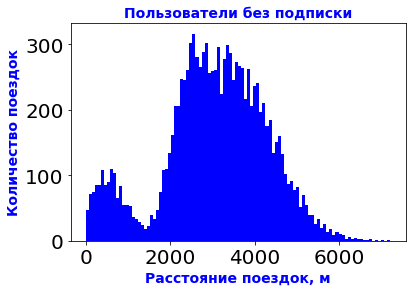

In [42]:
plt.hist(scooter_free['distance'], color = "blue", bins=100)
plt.title('Пользователи без подписки', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

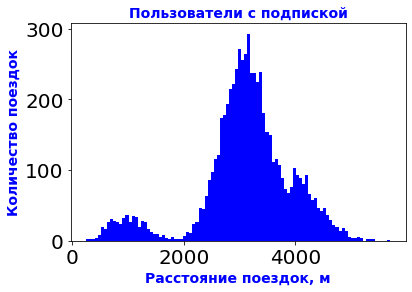

In [43]:
plt.hist(scooter_ultra['distance'], color = "blue", bins=100)
plt.title('Пользователи с подпиской', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

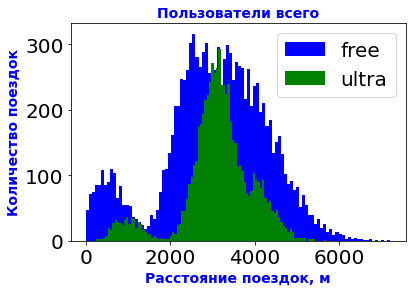

In [44]:
plt.hist(scooter_free['distance'], label='free' ,color = "blue", bins=100)
plt.hist(scooter_ultra['distance'], label='ultra' , color = "green", bins=100)
plt.title('Пользователи всего', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Расстояние поездок, м', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.legend(loc='upper right')
plt.show()

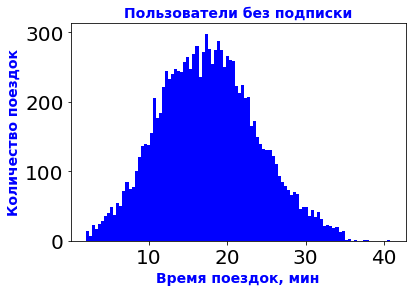

In [45]:
plt.hist(scooter_free['duration'], color = "blue", bins=100)
plt.title('Пользователи без подписки', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

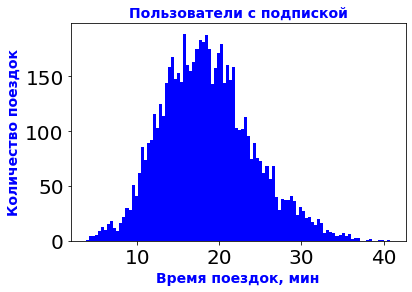

In [46]:
plt.hist(scooter_ultra['duration'], color = "blue", bins=100)
plt.title('Пользователи с подпиской', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.show()

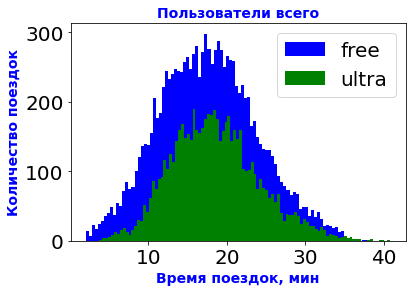

In [47]:
plt.hist(scooter_free['duration'], label='free' ,color = "blue", bins=100)
plt.hist(scooter_ultra['duration'], label='ultra' , color = "green", bins=100)
plt.title('Пользователи всего', fontsize=14, fontweight="bold", color='blue')
plt.xlabel('Время поездок, мин', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Количество поездок', fontsize=14, fontweight="bold", color='blue')
plt.legend(loc='upper right')
plt.show()

***Анализ информации о времени и расстояниях поездок пользователей с подпиской и без показал:***
- клиенты с подпиской в основном не совершают поездки менее 500 метров

## Шаг 5. Проведём подсчёт выручки

<font size="4"><font color=blue>5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляем до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.
</font>

In [48]:
scooter['duration'] = np.ceil(scooter['duration'])
scooter_all = pd.pivot_table(scooter,
                       index=['user_id', 'date_month', 'subscription_type'],       
                       values=['distance', 'duration'],
                       aggfunc={'distance': [len, sum], 'duration': sum},
                       fill_value=0)

scooter_all.reset_index(inplace= True , level = ['subscription_type'])
scooter_all.head()

subscription_type distance              duration
                                          len          sum      sum
user_id date_month                                                 
1       1                      ultra        2  7027.511294       42
        4                      ultra        1   754.159807        7
        8                      ultra        2  6723.470560       46
        10                     ultra        2  5809.911100       32
        11                     ultra        3  7003.499363       56

<font size="4"><font color=blue>5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.
</font>

In [49]:
a = 50 # без подписки стоимость старта (начала поездки) — 50 рублей
b = 8 # без подписки стоимость одной минуты поездки
c = 6 # с подпиской Ultra стоимость одной минуты поездки
d = 199 # с подпиской Ultra абонентская плата — 199 рублей в месяц

scooter_all['price_month'] = np.where(scooter_all['subscription_type'] == 'free', 
a*scooter_all['distance']['len'] + b*scooter_all['duration']['sum'], 
c*scooter_all['duration']['sum'] + d)

scooter_all.head()

subscription_type distance              duration  \
                                          len          sum      sum   
user_id date_month                                                    
1       1                      ultra        2  7027.511294       42   
        4                      ultra        1   754.159807        7   
        8                      ultra        2  6723.470560       46   
        10                     ultra        2  5809.911100       32   
        11                     ultra        3  7003.499363       56   

                   price_month  
                                
user_id date_month              
1       1                  451  
        4                  241  
        8                  475  
        10                 391  
        11                 535

## Шаг 6. Проведём  проверку гипотез

<font size="4"><font color=blue>Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
</font>

<font size="4"><font color=blue>
6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим эту гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
</font>

***Начнём с формулировки гипотезы. <font size="4">_H₀_</font> всегда формулируется так, чтобы использовать знак равенства.\
<font size="4">_H₀_</font> — средняя продолжительность поездки пользователей с подпиской равна средней продолжительности пользователей без подписки.\
<font size="4">_H₁_</font>  — средняя продолжительность поездки пользователей с подпиской больше средней продолжительности пользователей без подписки.\
<font size="4">_α=5%_</font>***

In [50]:
ultra_mean = scooter_ultra['duration']
free_mean = scooter_free['duration']

print('средняя продолжительность поездки пользователей с подпиской: ', ultra_mean.mean().round(2))
print('средняя продолжительность поездки пользователей без подписки: ', free_mean.mean().round(2))

alpha = 0.05

results = st.ttest_ind(ultra_mean, free_mean, alternative='greater')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

средняя продолжительность поездки пользователей с подпиской:  18.54
средняя продолжительность поездки пользователей без подписки:  17.62
p-value: 3.4062883651171046e-23
Отвергаем нулевую гипотезу


***Полученное значение p-value (~3.4062883651171046e-23) меньше уровня значимости. Отвергаем нулевую гипотезу.  Альтернативная гипотеза верна, что средняя продолжительность поездки пользователей с подпиской больше средней продолжительности пользователей без подписки.***

<font size="4"><font color=blue>
6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим эту гипотезу и сделаем выводы.
</font>

***Начнём с формулировки гипотезы.\
<font size="4">_H₀_</font> — среднее расстояние одной поездки, которое проезжают пользователи с подпиской, равно 3130 метров.\
<font size="4">_H₁_</font>  — среднее расстояние, которое проезжают пользователи с подпиской, более 3130 метров.\
<font size="4">_α=5%_</font>***

In [51]:
ultra_dis_mean = scooter_ultra['distance']
dis_mean = 3130

alpha = 0.05

results = st.ttest_1samp(ultra_dis_mean, dis_mean, alternative='greater')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


***Полученное значение p-value (0.9195368847849785) больше уровня значимости. Нет оснований отвергать нулевую гипотезу. Значит верна гипотеза, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.***

<font size="4"><font color=blue>
6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.
</font>

***Начнём с формулировки гипотезы.\
<font size="4">_H₀_</font> — помесячная выручка пользователей с подпиской равна выручке от пользователей без подписки.\
<font size="4">_H₁_</font>  — помесячная выручка пользователей с подпиской выше, чем выручка от пользователей без подписки.\
<font size="4">_α=5%_</font>***

In [52]:
ultra_price_month = scooter_all.loc[scooter_all['subscription_type'] == 'ultra', 'price_month']
free_price_month = scooter_all.loc[scooter_all['subscription_type'] == 'free', 'price_month']

print('средняя годовая выручка от пользователей с подпиской: ', ultra_price_month.mean().round(2))
print('средняя годовая выручка от пользователей без подписки: ', free_price_month.mean().round(2))

alpha = 0.05

results = st.ttest_ind(ultra_price_month, free_price_month, alternative='greater')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

средняя годовая выручка от пользователей с подпиской:  362.79
средняя годовая выручка от пользователей без подписки:  331.82
p-value: 5.937346250845203e-26
Отвергаем нулевую гипотезу


***Полученное значение p-value (~5.937346250845203e-26) меньше уровня значимости. Отвергаем нулевую гипотезу. Верна альтернативная гипотеза, что помесячная выручка пользователей с подпиской выше, чем выручка от пользователей без подписки.***

<font size="4"><font color=blue>
6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?
</font>

***Начнём с формулировки гипотезы.\
Имеем некоторый файл, который содержит для каждого пользователя данные о количестве обращений до обновления и после него. Извлечем из него данные в дадасет <font size="4">_Before_</font> о количестве обращений до обновления и в <font size="4">_After_</font> после него.\
Начнём с формулировки гипотезы.\
<font size="4">_H₀_</font> — количество обращений не изменилось.\
<font size="4">_H₁_</font>  — количество обращений стало меньше после обновления сервера.\
<font size="4">_α=5%_</font>***

In [53]:
before = pd.DataFrame(np.random.randint(0, 1000, (1000, 1)), columns=['name'])
after = pd.DataFrame(np.random.randint(0, 1000, (1000, 1)), columns=['name'])

alpha = 0.05

results = st.ttest_rel(before, after, alternative='greater')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

p-value: [0.29340576]
Нет оснований отвергнуть нулевую гипотезу


## Шаг 7. Решим задачи распределения

<font size="4"><font color=blue>7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберём параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.
</font>

***Подберём параметры распределения в цикле:***

In [54]:
p = 0.1
k = 100
po = 0.05

for n in range(k+1,k*100):
    sigma = sqrt(n * p * (1 - p))
    mu = n * p
    distr = st.norm(mu, sigma)
    if po < 1 - distr.cdf(k):
        break 

print('n =', n)
print(mu)
print(sigma)

n = 856
85.60000000000001
8.777243302996677


Мы посчитали параметры распределения:\
<font size="5">$\mu$</font> = 85.6\
<font size="5">$\sigma$</font> = 8.8

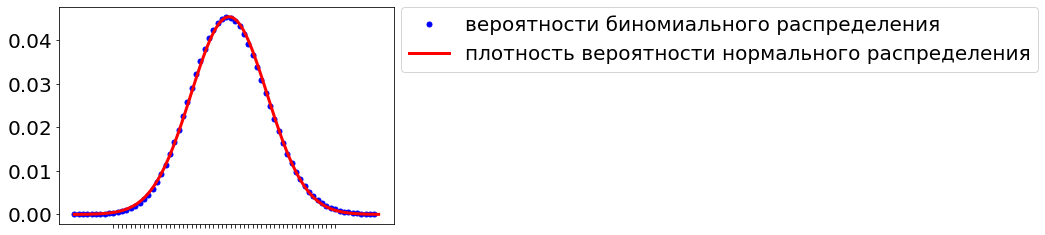

Условие хорошей аппроксимации выполняется


In [55]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятности биномиального распределения')
ax.set_xticklabels([])

x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=1, label='плотность вероятности нормального распределения')
ax.set_xticklabels([])

x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

ax.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие хорошей аппроксимации выполняется')
else:
    print('Условие хорошей аппроксимации не выполняется')

***Мы подобрали в цикле параметры распределения, построили график и убедились в выполнении условия хорошей аппроксимации. Посчитали, что 856 это минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить план была примерно 5%.***

<font size="4"><font color=blue>7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
</font>

***Апроксимируем биноминальное распределение нормальным и посчитаем:***

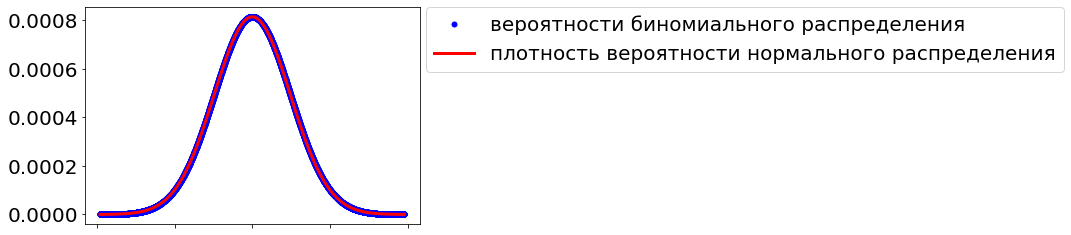

Условие хорошей аппроксимации выполняется


In [56]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
n = 1000000
p = 0.4

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятности биномиального распределения')
ax.set_xticklabels([])
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=1, label='плотность вероятности нормального распределения')
ax.set_xticklabels([]) 
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
#ax.set_xticks(x_ticks)

ax.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие хорошей аппроксимации выполняется')
else:
    print('Условие хорошей аппроксимации не выполняется')

In [57]:
distr = st.norm(mu, sigma)

result = distr.cdf(399500)

print(result*100,'%')

15.371708296369768 %


***Построили график и убедились в выполнении условия хорошей аппроксимации. Посчитали, что вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет около 15.37%.***

## Общий вывод

<font size="4"><font color=blue>Были проанализированы данные полученные из 3 файлов с информацией о пользователях, их поездках и подписках популярного сервиса аренды самокатов GoFast. Проведен аннализ данных на наличие пропусков и дубликатов. Проведены ииследования полученных данных с их визуализацией. Проверены ряд гипотез и решены задачи на распределения.

- Данные предоставлены за период с 1 января 2021 года по 30 декабря 2021 годов. 
- Чаще всего в наших данных пользователей упоминается город Пятигорск 14.28% и реже всего Москва 10.95%;
- Среди предоставленных данных количество пользователей с подпиской составляет 45.6%, а без подписки 54.4%;    
- Исследование показало, что возраст пользователей сервиса самокатов находится в диапазоне от 12 до 43 лет. Максимальным спросом у сервиса пользуется клиенты с возрастом 25 лет;
- Исследование на пройденное пользователями расстояния поездок показало, что мы имеем 2 значимых пика на гистограмме. Малый всплеск в районе около 700 м преодолеваемое клиентами сервиса и второй около 3200 метров. Допускаем, что первая группа со средним преодоливаемым расстоянием 700 м использует самокат, чтобы доехать до ближайшего пункта пересадки на другой транспорт (метро, автобус). А вторая группа принимает решение продолжать путь на большее расстояние до конечного пунтка назначения.
- Исследование показало значительное количество поездок с указанным временем 0.5 минут. При этом расстояние пройденное при этих поездках было значительное. Аномальные ошибочные значения были выевлены и они составляли 0.53% от общего числа поездок. Аномалии заменены. Поездок со временем менее 1 минуты в таблице устранены. Минимальное время поездки после исправления 2 минуты. Видимо программное обеспечение самоката фиксировало пройденное расстояние, но по ошибке выдавало время поездки 0.5 минут.
- Анализ графика показал, что самым распространненым можно считать продолжительность поездки около 18 минут;
- Клиенты с подпиской в основном не совершают поездки менее 500 метров;
- Определели, что средняя продолжительность времени поездок пользователей с подпиской выше, чем пользователи без подписки;
- Выяснили, что помесячная выручка пользователей с подпиской выше, чем выручка от пользователей без подписки.
</font>